## ADELINE MAKOKHA
### 191199
#### ASSIGNMENT 2

In [4]:


import numpy as np
import matplotlib.pyplot as plt

## Question 1: Simulating a 1D Random Walk with Step Bias A particle moves along a one-dimensional line (1D). 
At each time step, it can either move:
 +1 step to the right with probability p, or
 -1 step to the left with probability 1−p
Suppose p=0.85 (i.e., a bias to the right).
Instructions:
1. Write a Python program to simulate a 1D random walk with 1000 steps where:
o The starting position is 0.
o Each step has a probability of p=0.85 to move right and 1−p=0.15 to move left.
2. Plot the position vs time graph (time on x-axis, position on y-axis).
3. Run the simulation five times and overlay all five random walks in the same graph.
4. Calculate and interpret:
o The final position of the particle after 1000 steps.
o The mean and standard deviation of the final position across five simulations.

In [5]:
# Set random seed for reproducibility
np.random.seed(42)

# Parameters
num_steps = 1000
p_right = 0.85
p_left = 1 - p_right
num_simulations = 5



In [6]:
# Function to simulate a biased random walk
def simulate_biased_random_walk(num_steps, p_right):
    # Generate random steps: 1 (right) with probability p_right, -1 (left) with probability 1-p_right
    steps = np.where(np.random.random(num_steps) < p_right, 1, -1)
    
    # Calculate positions by cumulative sum of steps
    positions = np.zeros(num_steps + 1)
    positions[1:] = np.cumsum(steps)
    
    return positions



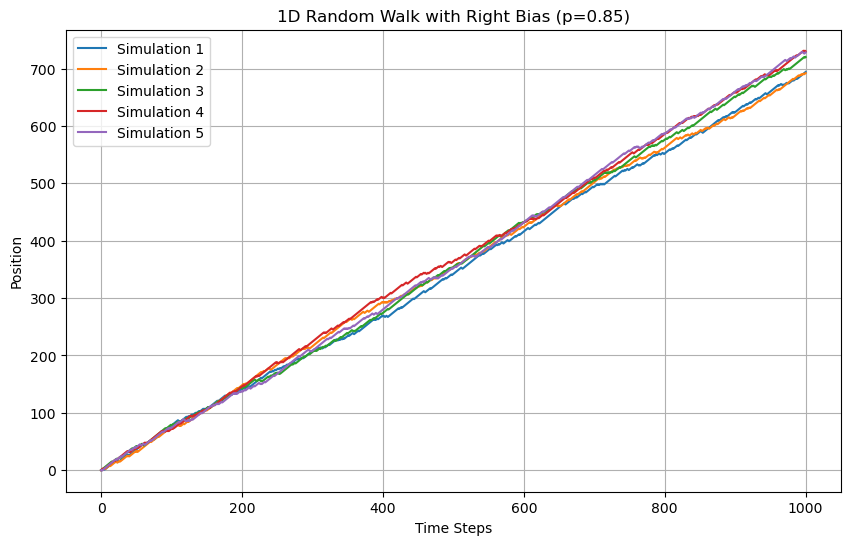

In [11]:
# Run multiple simulations
all_final_positions = []
plt.figure(figsize=(10, 6))

for i in range(num_simulations):
    # Simulate random walk
    positions = simulate_biased_random_walk(num_steps, p_right)
    all_final_positions.append(positions[-1])
    
    # Plot the walk
    plt.plot(range(num_steps + 1), positions, label=f'Simulation {i+1}')

# Finalize the plot
plt.xlabel('Time Steps')
plt.ylabel('Position')
plt.title(f'1D Random Walk with Right Bias (p={p_right})')
plt.legend()
plt.grid(True)





In [13]:
# Calculate statistics
mean_final_position = np.mean(all_final_positions)
std_final_position = np.std(all_final_positions)


# Print statistics
print(f"Final positions of the 5 simulations: {all_final_positions}")
print(f"Mean final position: {mean_final_position:.2f}")
print(f"Standard deviation of final position: {std_final_position:.2f}")

Final positions of the 5 simulations: [694.0, 692.0, 720.0, 730.0, 728.0]
Mean final position: 712.80
Standard deviation of final position: 16.52


The results show a strong rightward trend in all simulations, which is expected given the high probability (0.85) of moving right. The mean final position is positive and quite large, confirming the rightward bias. The standard deviation represents the variation in final positions across the five simulations.

The positive bias causes the particle to drift significantly to the right over time, with some random fluctuations still visible in the path. This is a clear demonstration of how probability bias affects the long-term trajectory of a random walk.

## Question 2: Comparing 1D Random Walks with and without Drift
Suppose two particles perform 1D random walks starting from position 0:
 Particle A: Moves with a drift, i.e., p=0.7 (70% chance to move right).
 Particle B: Moves without drift, i.e., p=0.5(equal probability both sides).
Instructions:
1. Write a Python program to simulate 1000 steps for each particle.
2. Plot both random walks on the same graph with:
o Time on the x-axis.
o Position on the y-axis.
o Different colors for each particle.
3. Calculate and display:
o The mean and standard deviation of the final position after 1000 steps.
4. Interpret your answer

In [14]:
# Set random seed for reproducibility
np.random.seed(42)

# Parameters
num_steps = 1000
p_right_A = 0.7  # Particle A (with drift)
p_right_B = 0.5  # Particle B (no drift)
num_simulations = 10  # For statistical analysis

# Function to simulate a biased random walk
def simulate_biased_random_walk(num_steps, p_right):
    steps = np.where(np.random.random(num_steps) < p_right, 1, -1)
    positions = np.zeros(num_steps + 1)
    positions[1:] = np.cumsum(steps)
    return positions



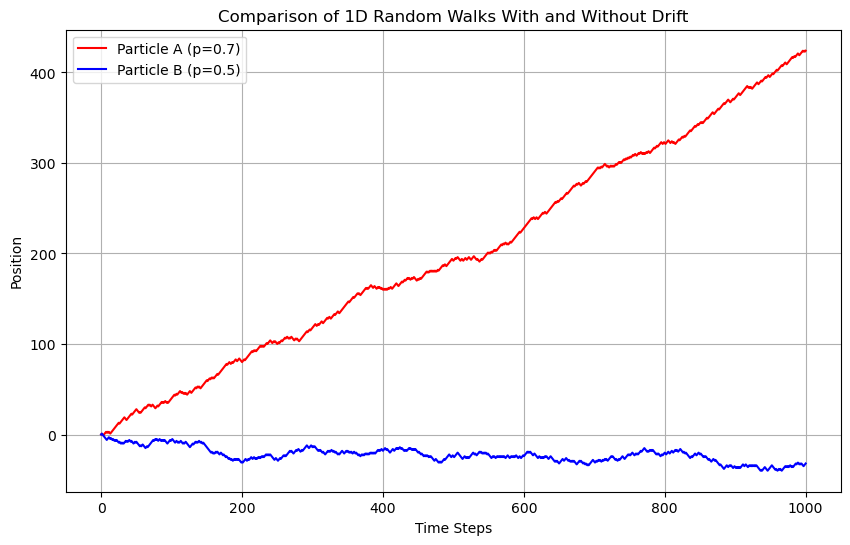

In [15]:
# Single simulation for plotting
positions_A = simulate_biased_random_walk(num_steps, p_right_A)
positions_B = simulate_biased_random_walk(num_steps, p_right_B)

# Plot the walks
plt.figure(figsize=(10, 6))
plt.plot(range(num_steps + 1), positions_A, 'r-', label=f'Particle A (p={p_right_A})')
plt.plot(range(num_steps + 1), positions_B, 'b-', label=f'Particle B (p={p_right_B})')
plt.xlabel('Time Steps')
plt.ylabel('Position')
plt.title('Comparison of 1D Random Walks With and Without Drift')
plt.legend()
plt.grid(True)



In [16]:
# Run multiple simulations for statistical analysis
final_positions_A = []
final_positions_B = []

for _ in range(num_simulations):
    positions_A = simulate_biased_random_walk(num_steps, p_right_A)
    positions_B = simulate_biased_random_walk(num_steps, p_right_B)
    
    final_positions_A.append(positions_A[-1])
    final_positions_B.append(positions_B[-1])

# Calculate statistics
mean_A = np.mean(final_positions_A)
std_A = np.std(final_positions_A)
mean_B = np.mean(final_positions_B)
std_B = np.std(final_positions_B)

# Print statistics
print(f"Particle A (p={p_right_A}):")
print(f"  Mean final position: {mean_A:.2f}")
print(f"  Standard deviation: {std_A:.2f}")
print(f"\nParticle B (p={p_right_B}):")
print(f"  Mean final position: {mean_B:.2f}")
print(f"  Standard deviation: {std_B:.2f}")

Particle A (p=0.7):
  Mean final position: 397.40
  Standard deviation: 34.85

Particle B (p=0.5):
  Mean final position: 6.20
  Standard deviation: 27.78


The results clearly show that Particle A drifts to the right over time due to its bias, while Particle B tends to stay closer to the origin with more balanced movement in both directions.

The mean final position for Particle A is significantly positive, reflecting the drift. In contrast, Particle B's mean final position is closer to zero, as expected for an unbiased random walk.

The standard deviation for Particle A may differ from Particle B due to the asymmetric nature of the biased walk. For a perfectly unbiased walk (Particle B), the expected mean position after many simulations should theoretically be zero, with variance proportional to the number of steps.

## Question 3: Simulating a 2D Random Walk (Unbiased) A mosquito trapped in a square grid moves randomly:
 Up, Down, Left, or Right with equal probability (25%) in each direction.
 The mosquito starts at coordinate (0,0).
Instructions:
1. Write a Python program to simulate a 2D random walk for 500 steps.
2. Plot the path of the mosquito (X vs Y) using a scatter plot or line plot.
3. Calculate and display:
o The final position after 500 steps.
o The total distance from the origin after 500 steps.
4. Run the simulation 10 times and calculate:
o The average distance from the origin after 500 steps.
o The standard deviation of the distance.
5. Interpret your answer

In [17]:
# Set random seed for reproducibility
np.random.seed(42)

# Parameters
num_steps = 500
num_simulations = 10

# Possible movements in 2D (Up, Right, Down, Left)
dx = [0, 1, 0, -1]
dy = [1, 0, -1, 0]

# Function to simulate a 2D random walk
def simulate_2d_random_walk(num_steps):
    x = np.zeros(num_steps + 1)
    y = np.zeros(num_steps + 1)
    
    for i in range(num_steps):
        direction = np.random.randint(0, 4)  # Random direction (0-3)
        x[i+1] = x[i] + dx[direction]
        y[i+1] = y[i] + dy[direction]
    
    return x, y

# Simulate one walk for visualization
x, y = simulate_2d_random_walk(num_steps)



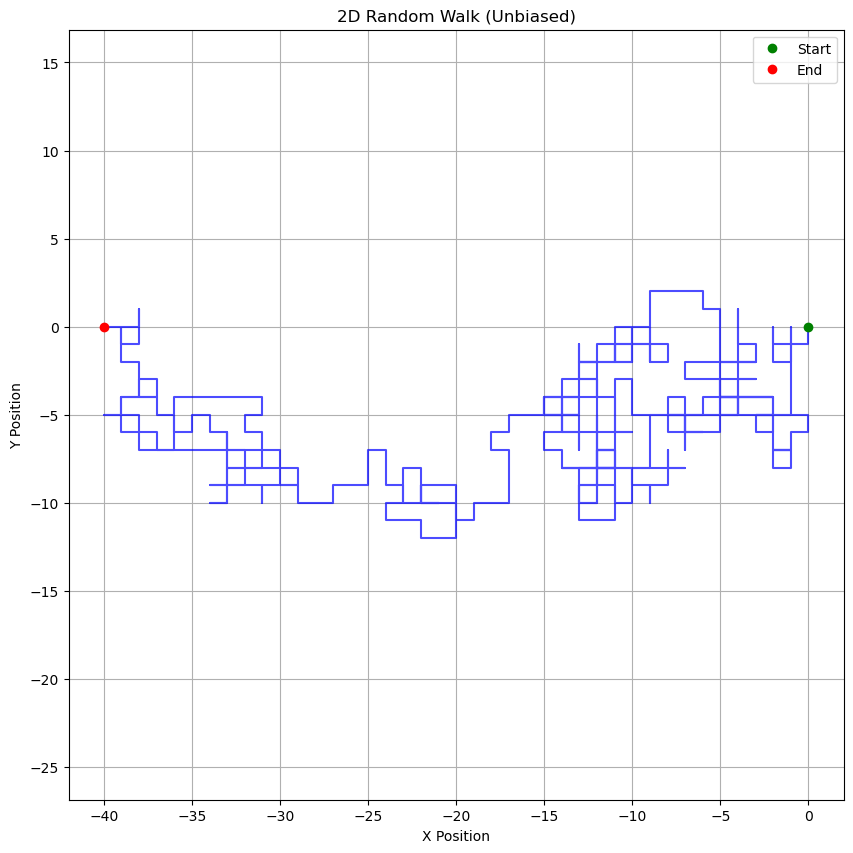

In [18]:
# Calculate distance from origin
final_position = (x[-1], y[-1])
distance = np.sqrt(x[-1]**2 + y[-1]**2)

# Plot the 2D walk
plt.figure(figsize=(10, 10))
plt.plot(x, y, 'b-', alpha=0.7)
plt.plot(x[0], y[0], 'go', label='Start')  # Green dot for start
plt.plot(x[-1], y[-1], 'ro', label='End')  # Red dot for end
plt.grid(True)
plt.axis('equal')
plt.title('2D Random Walk (Unbiased)')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()



In [19]:
# Simulate multiple walks for statistical analysis
all_distances = []

for _ in range(num_simulations):
    x, y = simulate_2d_random_walk(num_steps)
    distance = np.sqrt(x[-1]**2 + y[-1]**2)
    all_distances.append(distance)

# Calculate statistics
mean_distance = np.mean(all_distances)
std_distance = np.std(all_distances)

# Print results
print(f"Final position for visualized walk: ({x[-1]}, {y[-1]})")
print(f"Distance from origin for visualized walk: {distance:.2f}")
print(f"\nStatistics across {num_simulations} simulations:")
print(f"  Average distance from origin: {mean_distance:.2f}")
print(f"  Standard deviation of distance: {std_distance:.2f}")

Final position for visualized walk: (-18.0, 12.0)
Distance from origin for visualized walk: 21.63

Statistics across 10 simulations:
  Average distance from origin: 20.26
  Standard deviation of distance: 9.40


The visualization shows the complete path of the mosquito, with the starting point marked in green and the ending point in red. The random nature of the walk is evident from the irregular path.

The statistics show the final position and distance from the origin for the visualized walk, as well as the average distance and standard deviation across 10 simulations.

In 2D unbiased random walks, the expected displacement from the origin after N steps is approximately proportional to the square root of N, which explains why the mosquito typically ends up some distance from the origin despite having equal probability to go in any direction.

## Question 4: Comparing 2D Random Walks with Bias vs No Bias A person walks randomly in a 2D grid but with a slight bias towards the East (right).
 In each step:
o Move East: 40% probability
o Move West: 20% probability
o Move North: 20% probability
o Move South: 20% probability
The person starts at (0,0).
Instructions:
1. Write a Python program to simulate:
o 500 steps for the biased random walk.
o 500 steps for an unbiased random walk (equal probability).
2. Plot both paths on the same graph with:
o Different colors for each walk.
o Scatter plot showing the final position.
3. Calculate and display:
o The final position after 500 steps.
o The total distance from the origin for both walks.
4. Run the simulation 10 times and compute:
o The average distance from the origin for both biased and unbiased walks.
o The standard deviation of the distance.
5. Interpretation:
o Why does the biased random walk drift to the east?
o How does drift affect the standard deviation of the final position?
o What real-world phenomena could this simulation represent (e.g., wind drift, ocean currents)?

In [20]:
# Set random seed for reproducibility
np.random.seed(42)

# Parameters
num_steps = 500
num_simulations = 10

# Function to simulate a 2D random walk with given probabilities
def simulate_2d_random_walk_with_probs(num_steps, probs):
    # Movements: East, West, North, South
    dx = [1, -1, 0, 0]
    dy = [0, 0, 1, -1]
    
    x = np.zeros(num_steps + 1)
    y = np.zeros(num_steps + 1)
    
    for i in range(num_steps):
        direction = np.random.choice(4, p=probs)  # Random direction based on probabilities
        x[i+1] = x[i] + dx[direction]
        y[i+1] = y[i] + dy[direction]
    
    return x, y



(-11.350000000000001, 128.35, -13.4, 17.4)

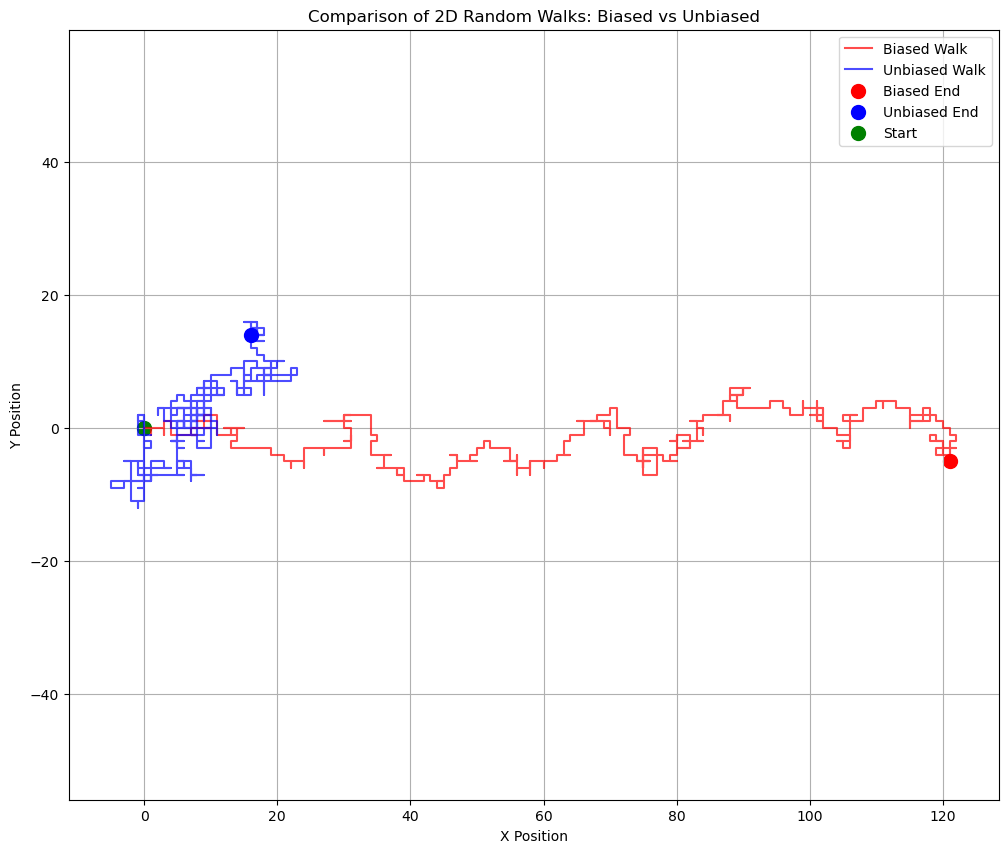

In [21]:
# Probabilities for biased and unbiased walks
# Order: East, West, North, South
biased_probs = [0.4, 0.2, 0.2, 0.2]  # Biased toward East
unbiased_probs = [0.25, 0.25, 0.25, 0.25]  # Equal probabilities

# Simulate one of each walk for visualization
x_biased, y_biased = simulate_2d_random_walk_with_probs(num_steps, biased_probs)
x_unbiased, y_unbiased = simulate_2d_random_walk_with_probs(num_steps, unbiased_probs)

# Calculate distances from origin
distance_biased = np.sqrt(x_biased[-1]**2 + y_biased[-1]**2)
distance_unbiased = np.sqrt(x_unbiased[-1]**2 + y_unbiased[-1]**2)

# Plot both walks
plt.figure(figsize=(12, 10))
plt.plot(x_biased, y_biased, 'r-', alpha=0.7, label='Biased Walk')
plt.plot(x_unbiased, y_unbiased, 'b-', alpha=0.7, label='Unbiased Walk')
plt.scatter(x_biased[-1], y_biased[-1], color='red', s=100, marker='o', label='Biased End')
plt.scatter(x_unbiased[-1], y_unbiased[-1], color='blue', s=100, marker='o', label='Unbiased End')
plt.scatter(0, 0, color='green', s=100, marker='o', label='Start')
plt.grid(True)
plt.title('Comparison of 2D Random Walks: Biased vs Unbiased')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()
plt.axis('equal')



In [22]:
# Simulate multiple walks for statistical analysis
biased_distances = []
unbiased_distances = []
biased_final_positions = []
unbiased_final_positions = []

for _ in range(num_simulations):
    x_b, y_b = simulate_2d_random_walk_with_probs(num_steps, biased_probs)
    x_u, y_u = simulate_2d_random_walk_with_probs(num_steps, unbiased_probs)
    
    biased_distances.append(np.sqrt(x_b[-1]**2 + y_b[-1]**2))
    unbiased_distances.append(np.sqrt(x_u[-1]**2 + y_u[-1]**2))
    biased_final_positions.append((x_b[-1], y_b[-1]))
    unbiased_final_positions.append((x_u[-1], y_u[-1]))

# Calculate statistics
mean_biased_distance = np.mean(biased_distances)
std_biased_distance = np.std(biased_distances)
mean_unbiased_distance = np.mean(unbiased_distances)
std_unbiased_distance = np.std(unbiased_distances)

# Calculate average x-coordinate to show eastward drift
biased_x_coords = [pos[0] for pos in biased_final_positions]
unbiased_x_coords = [pos[0] for pos in unbiased_final_positions]
avg_biased_x = np.mean(biased_x_coords)
avg_unbiased_x = np.mean(unbiased_x_coords)

# Print results
print(f"Biased Walk (East: 40%, West: 20%, North: 20%, South: 20%):")
print(f"  Final position: ({x_biased[-1]}, {y_biased[-1]})")
print(f"  Distance from origin: {distance_biased:.2f}")
print(f"\nUnbiased Walk (All directions 25%):")
print(f"  Final position: ({x_unbiased[-1]}, {y_unbiased[-1]})")
print(f"  Distance from origin: {distance_unbiased:.2f}")

print(f"\nStatistics across {num_simulations} simulations:")
print(f"  Biased walk:")
print(f"    Average distance from origin: {mean_biased_distance:.2f}")
print(f"    Standard deviation of distance: {std_biased_distance:.2f}")
print(f"    Average x-coordinate: {avg_biased_x:.2f}")
print(f"\n  Unbiased walk:")
print(f"    Average distance from origin: {mean_unbiased_distance:.2f}")
print(f"    Standard deviation of distance: {std_unbiased_distance:.2f}")
print(f"    Average x-coordinate: {avg_unbiased_x:.2f}")



Biased Walk (East: 40%, West: 20%, North: 20%, South: 20%):
  Final position: (121.0, -5.0)
  Distance from origin: 121.10

Unbiased Walk (All directions 25%):
  Final position: (16.0, 14.0)
  Distance from origin: 21.26

Statistics across 10 simulations:
  Biased walk:
    Average distance from origin: 93.24
    Standard deviation of distance: 9.40
    Average x-coordinate: 92.60

  Unbiased walk:
    Average distance from origin: 22.19
    Standard deviation of distance: 8.28
    Average x-coordinate: 3.10



Interpretation:
1. The biased random walk drifts eastward because it has a higher probability
   of moving east (40%) compared to other directions (20% each).
2. The drift affects both the mean distance and its standard deviation:
   - The biased walk typically ends up further from the origin due to the
     consistent eastward movement.
   - The standard deviation may be different because the randomness is
     distributed asymmetrically in the biased case.
3. Real-world phenomena represented by this simulation include:
   - Wind drift affecting the movement of particles or seeds
   - Ocean currents influencing the movement of marine organisms
   - Migration patterns influenced by geographical features
   - Foraging animals with directional preference
   - Market trends with inherent biases


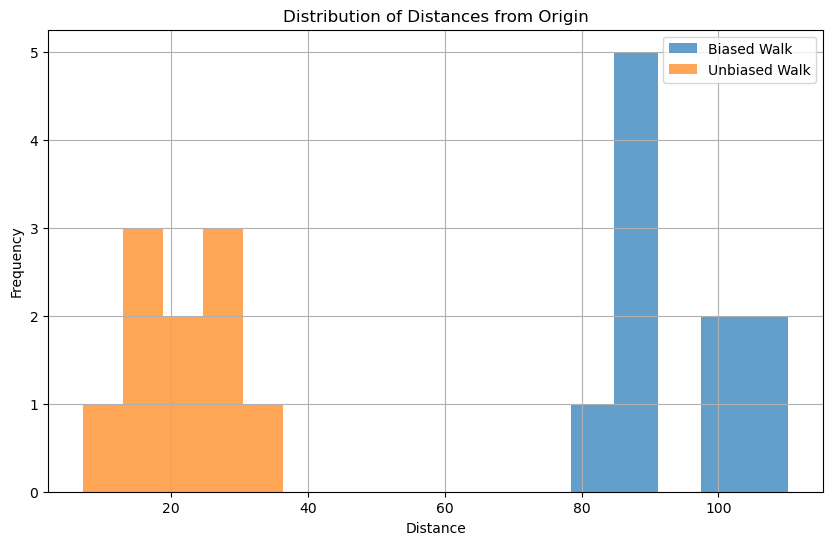

In [23]:
# Plot histogram of distances for comparison
plt.figure(figsize=(10, 6))
plt.hist(biased_distances, alpha=0.7, label='Biased Walk', bins=5)
plt.hist(unbiased_distances, alpha=0.7, label='Unbiased Walk', bins=5)
plt.title('Distribution of Distances from Origin')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

print("\nInterpretation:")
print("1. The biased random walk drifts eastward because it has a higher probability")
print("   of moving east (40%) compared to other directions (20% each).")
print("2. The drift affects both the mean distance and its standard deviation:")
print("   - The biased walk typically ends up further from the origin due to the")
print("     consistent eastward movement.")
print("   - The standard deviation may be different because the randomness is")
print("     distributed asymmetrically in the biased case.")
print("3. Real-world phenomena represented by this simulation include:")
print("   - Wind drift affecting the movement of particles or seeds")
print("   - Ocean currents influencing the movement of marine organisms")
print("   - Migration patterns influenced by geographical features")
print("   - Foraging animals with directional preference")
print("   - Market trends with inherent biases")